In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PSID
from PSID.evaluation import evalPrediction
from src.cross_validation_PSID import cross_validation, cross_validation_split
from src.explore_state_dimensions import plot_explorations
from src.explore_state_dimensions import explore_latent_behavior_dims
from train_PSID import train, plot_movement_pred
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
PATH_FEATURES = "/home/lauraflyra/Documents/BCCN/Lab_Rotation_USC/Code/Data/py_neuromodulation_derivatives/sub-000_ses-right_task-force_run-3/sub-000_ses-right_task-force_run-3_FEATURES.csv"
data_features = pd.read_csv(PATH_FEATURES, index_col=0)

In [18]:
feature_df_bandpass = pd.concat([data_features.filter(like='LFP'),data_features.filter(like='ECOG')], axis = 1).filter(like='bandpass_activity').to_numpy()
behavior_df = data_features["MOV_LEFT_CLEAN"].to_numpy().reshape(-1, 1)

In [19]:
idSys, mov_features_test_pred, mov_features_test, test_idx_features, eval_result = train(feature_df_bandpass, behavior_df, 8, 8, 30, eval_metrics = "R2", train_whole_data = False)

Behavior decoding r2:
  PSID => 0.512


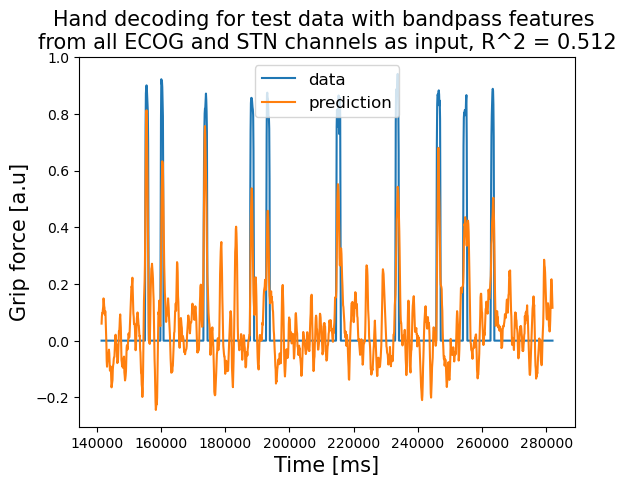

In [20]:
plot_movement_pred(data_features, mov_features_test_pred, mov_features_test, test_idx_features, eval_result)

In [21]:
df = data_features

In [22]:
df['time'].to_numpy().reshape(-1, 1)[test_idx_features]

array([[141500.],
       [141600.],
       [141700.],
       ...,
       [281700.],
       [281800.],
       [281900.]])

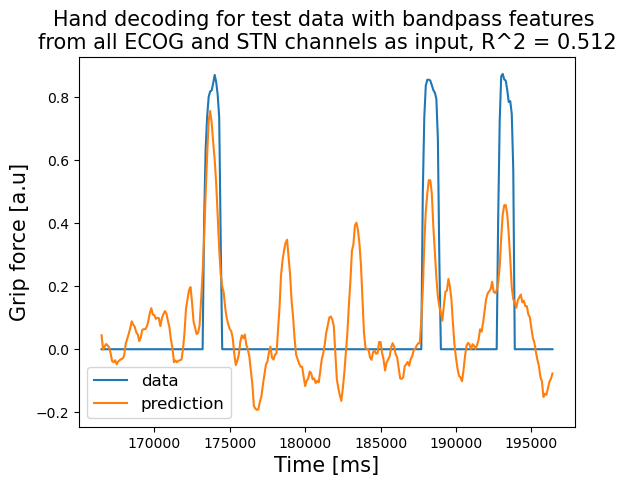

In [23]:
time_array = df['time'].to_numpy().reshape(-1, 1)[test_idx_features]
plt.plot(time_array[250:550], mov_features_test.reshape(-1,)[250:550], label = 'data')
plt.plot(time_array[250:550], mov_features_test_pred.reshape(-1,)[250:550], label = 'prediction')
plt.title("Hand decoding for test data with bandpass features \nfrom all ECOG and STN channels as input, R^2 = {:.3g}".format(np.mean(eval_result)), fontsize = 15)
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Grip force [a.u]", fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

In [24]:
feature_df_bandpass = data_features.filter(like='ECOG').filter(like='bandpass_activity').to_numpy()
behavior_df = data_features["MOV_LEFT_CLEAN"].to_numpy().reshape(-1, 1)

In [25]:
idSys, mov_features_test_pred, mov_features_test, test_idx_features, eval_result = train(feature_df_bandpass, behavior_df, 8, 8, 30, eval_metrics = "R2", train_whole_data = False)

Behavior decoding r2:
  PSID => 0.604


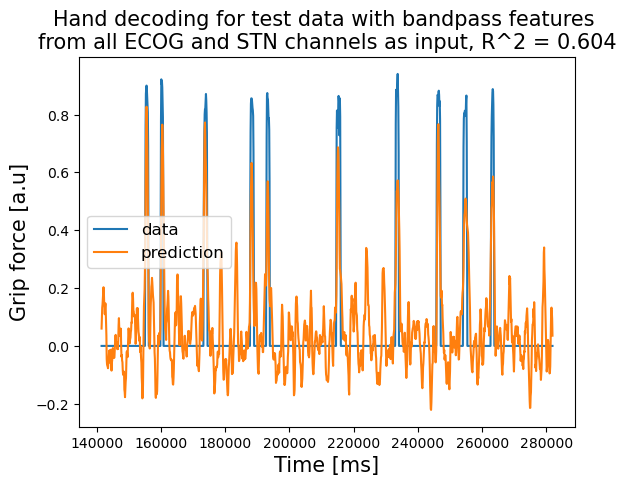

In [26]:
plot_movement_pred(data_features, mov_features_test_pred, mov_features_test, test_idx_features, eval_result)

In [27]:
df = data_features

In [28]:
df['time'].to_numpy().reshape(-1, 1)[test_idx_features]

array([[141500.],
       [141600.],
       [141700.],
       ...,
       [281700.],
       [281800.],
       [281900.]])

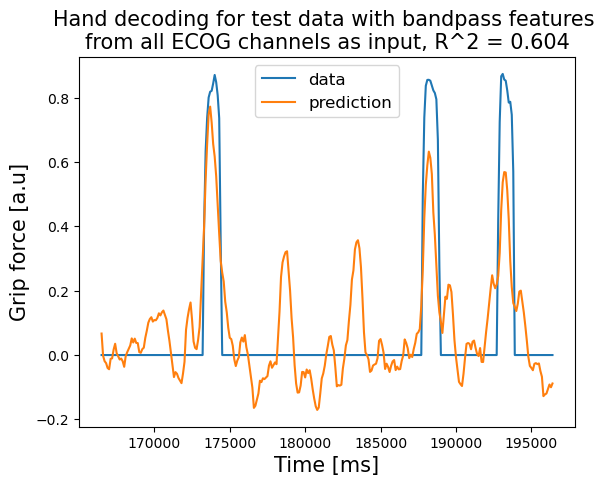

In [29]:
time_array = df['time'].to_numpy().reshape(-1, 1)[test_idx_features]
plt.plot(time_array[250:550], mov_features_test.reshape(-1,)[250:550], label = 'data')
plt.plot(time_array[250:550], mov_features_test_pred.reshape(-1,)[250:550], label = 'prediction')
plt.title("Hand decoding for test data with bandpass features \nfrom all ECOG channels as input, R^2 = {:.3g}".format(np.mean(eval_result)), fontsize = 15)
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Grip force [a.u]", fontsize = 15)
plt.legend(fontsize = 12)
plt.show()